In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-semester-result/data.csv
/kaggle/input/customer-segmentation/Train.csv
/kaggle/input/customer-segmentation/Test.csv


**During Covid students are promoted on the basis of their previous score.The average marks of all the previous semesters are taken to predict the next semester marks**

**Importing the Dataset**

In [75]:
df=pd.read_csv("../input/student-semester-result/data.csv")
df=pd.DataFrame(df)
df.head()

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Roll no.,Subject Code
0,8.11,7.68,7.11,7.43,8.18,115,Female,NaN,17020.0,16
1,6.48,5.90,4.15,4.29,4.96,115,Male,NaN,17021.0,16
2,8.41,8.24,7.52,8.25,7.75,115,Female,NaN,17022.0,16
3,7.33,6.83,6.33,6.79,6.89,115,Male,NaN,17023.0,16
4,7.89,7.34,7.22,7.32,7.46,115,Male,NaN,17024.0,16


**Dropping Columns that are not needed**


In [76]:
df.drop(['Gender',"Roll","Roll no.","College Code","Subject Code"],axis=1,inplace=True)


**Checking missing values in the dataset**

In [77]:
df.isnull().sum()


1st    2
2nd    4
3rd    2
4th    5
5th    6
dtype: int64

In [78]:
df.fillna(0,inplace=True)
df.isnull().sum()

1st    0
2nd    0
3rd    0
4th    0
5th    0
dtype: int64

In [79]:
df.shape

(178, 5)

**Understanding the correlation between data member of the dataset**


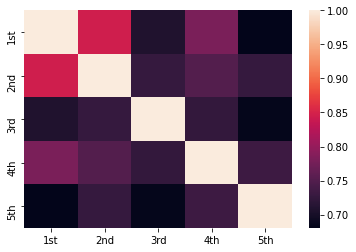

In [80]:
import seaborn as sns
corr=sns.heatmap(df.corr())

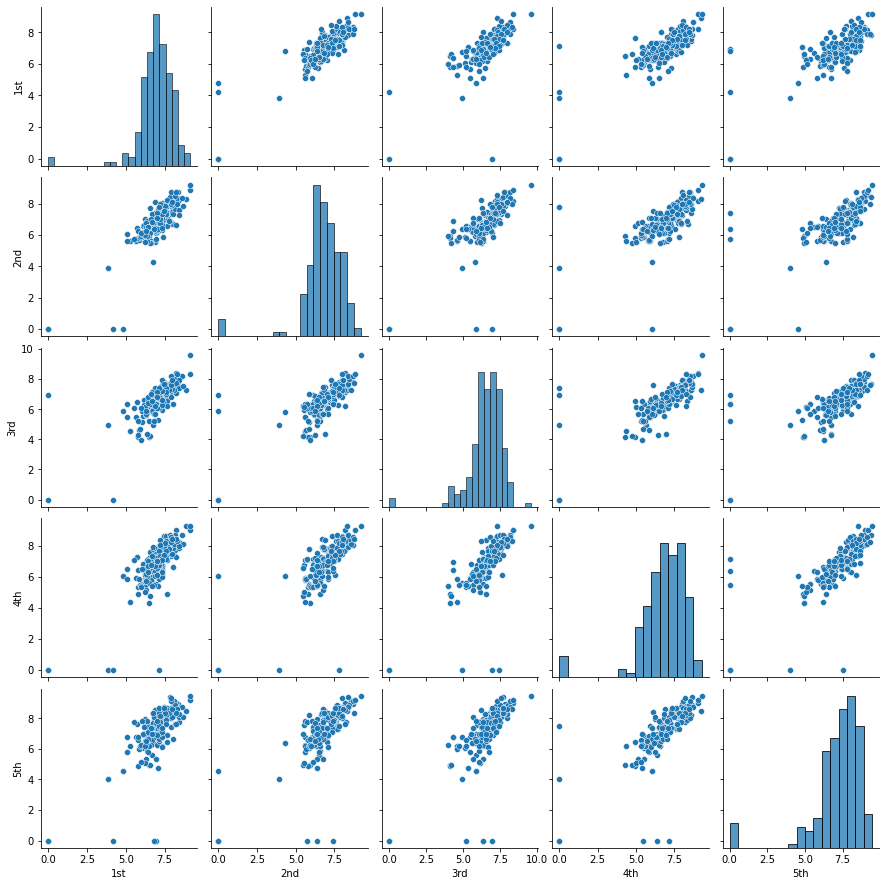

In [81]:
sns.pairplot(df)

In [82]:
df["1st"]=df["1st"]*9.5
df["2nd"]=df["2nd"]*9.5
df["3rd"]=df["3rd"]*9.5
df["4th"]=df["4th"]*9.5
df["5th"]=df["5th"]*9.5
df["avg"]=(df["1st"]+df["2nd"]+df["3rd"]+df["4th"]+df["5th"])*.2
df.head()

,1st,2nd,3rd,4th,5th,avg
0,77.045,72.960,67.545,70.585,77.710,73.169
1,61.560,56.050,39.425,40.755,47.120,48.982
2,79.895,78.280,71.440,78.375,73.625,76.323
3,69.635,64.885,60.135,64.505,65.455,64.923
4,74.955,69.730,68.590,69.540,70.870,70.737


**Now preprocessing is done**
The data is in required format.
Its time to divide the dataset into training and testing data


In [83]:
X=df.iloc[:,0:5].values
Y=df.iloc[:,5:6].values


**Split the dataset into training and testing data**

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

**Training the model**

**1. Using Linear Regression**

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model=LinearRegression()
model.fit(X_train,y_train)
y_predicted=model.predict(X_test)
score=r2_score(y_test,y_predicted)
score

1.0

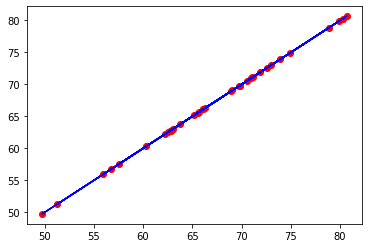

In [86]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predicted, color ='r')
plt.plot(y_test, y_predicted, color ='b')
plt.show()

**Predicting 6th semester percentage of a student**

In [87]:
def inp(x):
    x = np.array([x])
    x = x.reshape([1,-1])
    output = model.predict(x)
    print(output)

In [88]:
inp([[90,88,78,87,75]])

[[83.6]]
